In [60]:
import pandas as pd
import plotly.graph_objects as go
df=pd.read_csv("retail_store_inventory.csv")
df

,Date,Store ID,Category,Region,Inventory Level,Units Sold,Units Ordered,Demand Forecast,Price,Discount,Weather Condition,Holiday/Promotion,Competitor Pricing,Seasonality,? 100.00
0,01-01-2022,S001,Groceries,North,231,127,55,135.47,34,20,Rainy,0,29.69,Autumn,NaN
1,01-01-2022,S001,Toys,South,204,150,66,144.04,63,20,Sunny,0,66.16,Autumn,NaN
2,01-01-2022,S001,Toys,West,102,65,51,74.02,28,10,Sunny,1,31.32,Summer,NaN
3,01-01-2022,S001,Toys,North,469,61,164,62.18,33,10,Cloudy,1,34.74,Autumn,NaN
4,01-01-2022,S001,Electronics,East,166,14,135,9.26,74,0,Sunny,0,68.95,Summer,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73095,01-01-2024,S005,Furniture,East,96,8,127,18.46,74,20,Snowy,0,72.45,Winter,NaN
73096,01-01-2024,S005,Toys,North,313,51,101,48.43,83,10,Cloudy,0,83.78,Autumn,NaN
73097,01-01-2024,S005,Clothing,West,278,36,151,39.65,11,10,Rainy,0,10.91,Winter,NaN
73098,01-01-2024,S005,Toys,East,374,264,21,270.52,53,20,Rainy,0,55.80,Spring,NaN


In [31]:
df.isnull().sum()

Date                      0
Store ID                  0
Category                  0
Region                    0
Inventory Level           0
Units Sold                0
Units Ordered             0
Demand Forecast           0
Price                     0
Discount                  0
Weather Condition         0
Holiday/Promotion         0
Competitor Pricing        0
Seasonality               0
? 100.00              73100
dtype: int64

In [32]:
df.drop(["Holiday/Promotion","Discount"],axis=1,inplace=True)


In [33]:
df.dtypes

Date                   object
Store ID               object
Category               object
Region                 object
Inventory Level         int64
Units Sold              int64
Units Ordered           int64
Demand Forecast       float64
Price                   int64
Weather Condition      object
Competitor Pricing    float64
Seasonality            object
? 100.00              float64
dtype: object

In [34]:
top_5_category=df.groupby(by="Category")["Units Sold"].sum()
top_5_category.nlargest(5)

Category
Furniture      2025017
Groceries      2000482
Clothing       1999166
Toys           1990485
Electronics    1960432
Name: Units Sold, dtype: int64

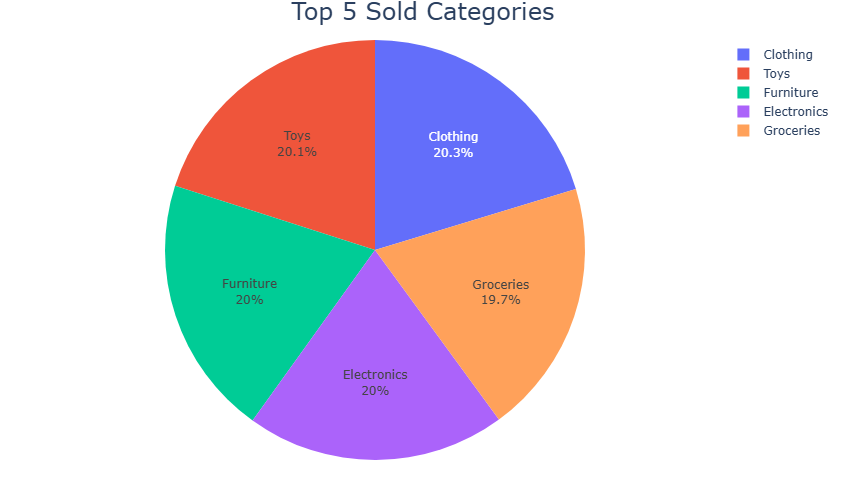

In [51]:
# Top 5 unit sold
label=["Furniture","Groceries","Clothing","Toys","Electronics"]

explode = [0, 0, 0, 0, 0] 
fig = go.Figure(data=[go.Pie(
    labels=label,
    values=top_5_category,
    pull=explode,
    textinfo='percent+label', 
     
)])


fig.update_layout(
    title="Top 5 Sold Categories", 
    title_x=0.5,  
    title_font=dict(size=24), 
    width=600, 
    height=500, 
    margin=dict(t=40, b=40, l=40, r=40),  
    showlegend=True  
)

fig.show()




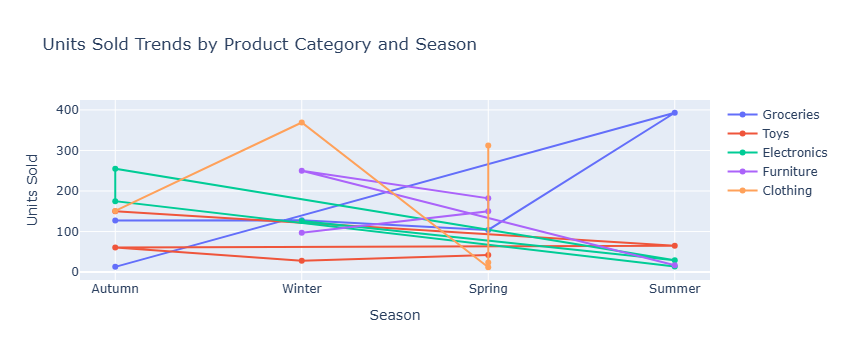

In [44]:
fig1 = go.Figure()
categories=df["Category"].unique()
for cat in categories:
    n=df[df["Category"]==cat].head()
    fig1.add_trace(go.Scatter(
        x=n['Seasonality'],
        y=n['Units Sold'],
        mode='lines+markers',
        name=cat,
    ))
fig1.update_layout(
    title='Units Sold Trends by Product Category and Season',
    xaxis_title='Season',
    yaxis_title='Units Sold',
    showlegend=True
)


fig1.show()

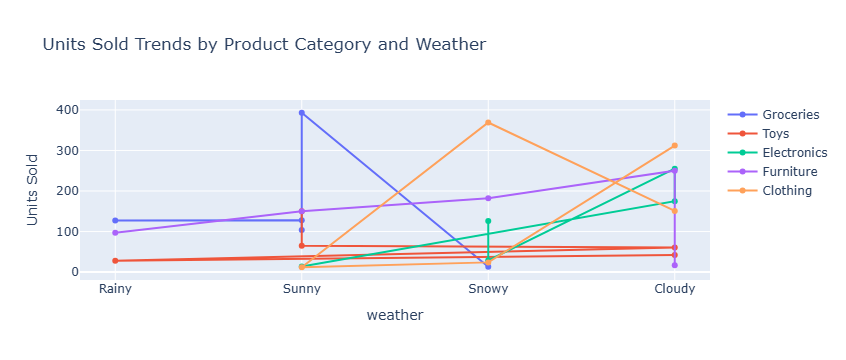

In [46]:
fig2 = go.Figure()
categorie=df["Category"].unique()

for cat in categorie:
    m=df[df["Category"]==cat].head()
    fig2.add_trace(go.Scatter(
        x=m['Weather Condition'],
        y=m['Units Sold'],
        mode='lines+markers',
        name=cat,
    ))
fig2.update_layout(
    title='Units Sold Trends by Product Category and Weather',
    xaxis_title='weather',
    yaxis_title='Units Sold',
    showlegend=True
)


fig2.show()

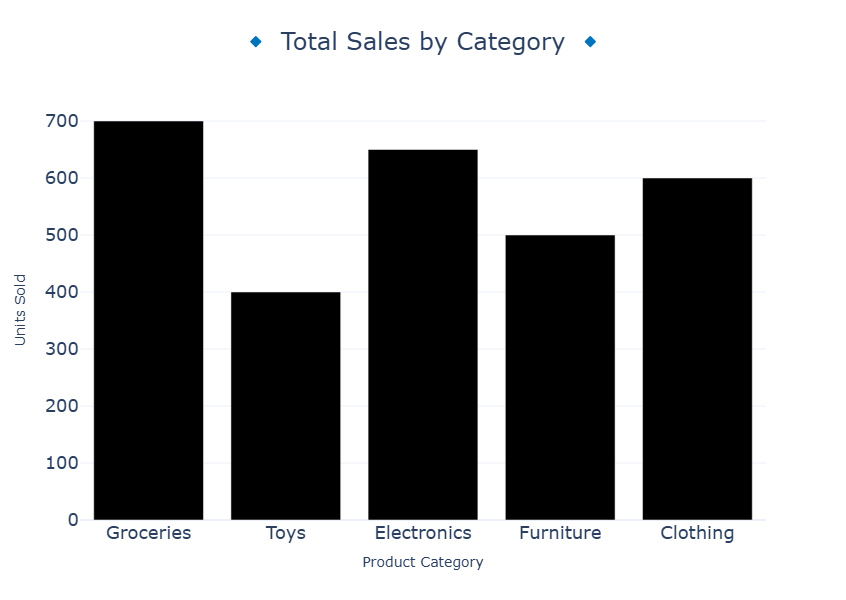

In [59]:

categories = df["Category"]
sales = df["Units Sold"]


fig3 = go.Figure()

fig3.add_trace(go.Bar(
    x=categories, 
    y=sales, 
    marker_color='black', 
    name='Units Sold'
))


fig3.update_layout(
    title="🔹 Total Sales by Category 🔹",
    title_x=0.5,  
    title_font=dict(size=24),
    xaxis_title="Product Category",
    yaxis_title="Units Sold",
    xaxis=dict(tickfont=dict(size=18)),  
    yaxis=dict(tickfont=dict(size=18)),
    width=900,  
    height=600,  
    template="plotly_white"
)


fig3.show()


1012212


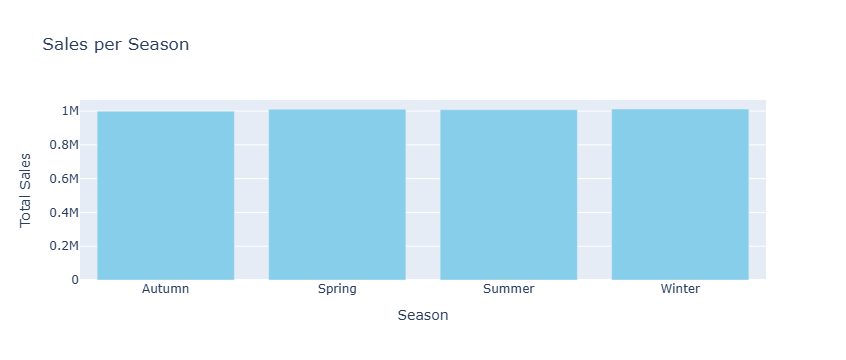

In [63]:

sales_per_season = df.groupby(by='Seasonality')['Price'].sum()
print(sales_per_season.max())


fig4 = go.Figure(data=[go.Bar(
    x=sales_per_season.index,  # x-axis is the seasons
    y=sales_per_season.values,  # y-axis is the sales
    marker=dict(color='skyblue')  # Color of the bars
)])


fig4.update_layout(
    title='Sales per Season',
    xaxis_title='Season',
    yaxis_title='Total Sales',
    template='plotly',
)


fig4.show()


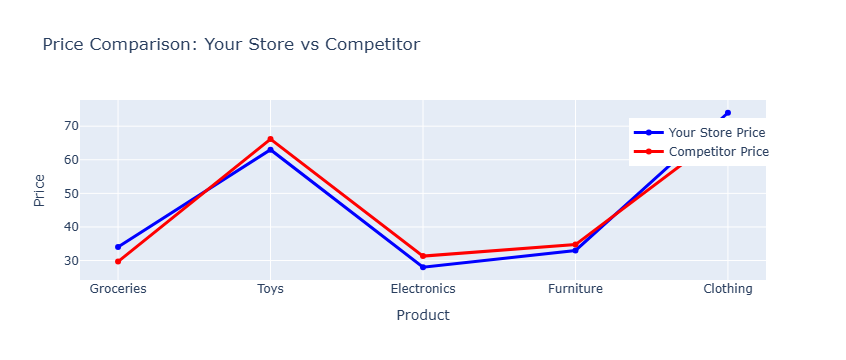

In [66]:




fig5 = go.Figure()

# Add your store's prices
fig5.add_trace(go.Scatter(
    x=df["Category"].unique(),
    y=df['Price'],
    mode='lines+markers',
    name='Your Store Price',
    line=dict(color='blue', width=3)
))

# Add competitor's prices
fig5.add_trace(go.Scatter(
    x=df['Category'].unique(),
    y=df['Competitor Pricing'],
    mode='lines+markers',
    name='Competitor Price',
    line=dict(color='red', width=3)
))


fig5.update_layout(
    title='Price Comparison: Your Store vs Competitor',
    xaxis_title='Product',
    yaxis_title='Price',
    template='plotly',
    legend=dict(x=0.8, y=0.9)
)

fig5.show()
